<a href="https://colab.research.google.com/github/andy258741/NCHU_Finance/blob/main/7112029030_w7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 獲取大立光整年資料

In [11]:
import requests
import pandas as pd
from datetime import datetime

# 將民國年轉換為西元年
def convert_date(date_str):
    year, month, day = date_str.split('/')
    year = str(int(year) + 1911)  # 民國年轉西元年
    return f"{year}/{month}/{day}"

def fetch_monthly_data(stock_no, year, month):
    # 定義日期，使用每月的第一天作為請求參數
    date_str = f"{year}{month:02d}01"
    url = f"https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date={date_str}&stockNo={stock_no}"

    # 發送 API 請求
    response = requests.get(url)

    # 如果請求成功，返回JSON數據
    if response.status_code == 200:
        return response.json()
    else:
        return None

def fetch_yearly_data(stock_no, year):
    all_data = []

    for month in range(1, 13):  # 從1月到12月
        data = fetch_monthly_data(stock_no, year, month)
        if data and data['stat'] == 'OK':
            # 將每個月的數據添加到列表中
            all_data.extend(data['data'])

    # 將數據轉換為DataFrame，並指定欄位名稱
    df = pd.DataFrame(all_data, columns=["日期", "成交股數", "成交金額", "開盤價", "最高價", "最低價", "收盤價", "漲跌價差", "成交筆數"])

    # 全部換成float以利後續計算
    # 使用 applymap 將 replace 和 astype 應用於每個單元格
    for col in ["成交股數", "成交金額", "開盤價", "最高價", "最低價", "收盤價", "成交筆數"]:
        df[col] = df[col].astype(str).str.replace(",", "").astype(float)

    # 將日期從民國年轉換為西元年格式
    df['日期'] = df['日期'].apply(convert_date)

    # 將日期欄位轉換為datetime格式，並重新排序數據
    df['日期'] = pd.to_datetime(df['日期'], format='%Y/%m/%d')
    df = df.sort_values(by='日期').reset_index(drop=True)

    return df

# 查詢大立光 (3008) 在 2024 年的收盤價
stock_no = '3008'
year = 2024

# 獲取一整年的數據
df = fetch_yearly_data(stock_no, year)

# 查看一整年每日交易資料
df

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,2024-01-02,1255925.0,3.492707e+09,2860.0,2860.0,2745.0,2785.0,-85.00,6197.0
1,2024-01-03,1426707.0,3.836737e+09,2725.0,2730.0,2665.0,2685.0,-100.00,6281.0
2,2024-01-04,980717.0,2.608750e+09,2680.0,2710.0,2640.0,2650.0,-35.00,3239.0
3,2024-01-05,1271931.0,3.328926e+09,2640.0,2675.0,2585.0,2595.0,-55.00,5751.0
4,2024-01-08,1004026.0,2.592676e+09,2600.0,2620.0,2550.0,2580.0,-15.00,4016.0
...,...,...,...,...,...,...,...,...,...
191,2024-10-21,1330934.0,3.159545e+09,2335.0,2410.0,2335.0,2400.0,+75.00,5111.0
192,2024-10-22,618903.0,1.488712e+09,2390.0,2435.0,2385.0,2400.0,0.00,2668.0
193,2024-10-23,311784.0,7.506688e+08,2400.0,2425.0,2385.0,2405.0,+5.00,1803.0
194,2024-10-24,467190.0,1.114206e+09,2385.0,2405.0,2370.0,2370.0,-35.00,3130.0


/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 20132 (\N{CJK UNIFIED IDEOGRAPH-4EA4}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 32929 (\N{CJK UNIFIED IDEOGRAPH-80A1}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
df['成交股數'].plot(kind='hist', bins=20, title='成交股數')
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 20132 (\N{CJK UNIFIED IDEOGRAPH-4EA4}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 38989 (\N{CJK UNIFIED IDEOGRAPH-984D}) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
df['成交金額'].plot(kind='hist', bins=20, title='成交金額')
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 38283 (\N{CJK UNIFIED IDEOGRAPH-958B}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 30436 (\N{CJK UNIFIED IDEOGRAPH-76E4}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
df['開盤價'].plot(kind='hist', bins=20, title='開盤價')
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
df['最高價'].plot(kind='hist', bins=20, title='最高價')
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 20132 (\N{CJK UNIFIED IDEOGRAPH-4EA4}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 32929 (\N{CJK UNIFIED IDEOGRAPH-80A1}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 38989 (\N{CJK UNIFIED IDE

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='成交股數', y='成交金額', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 20132 (\N{CJK UNIFIED IDEOGRAPH-4EA4}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 38989 (\N{CJK UNIFIED IDEOGRAPH-984D}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 38283 (\N{CJK UNIFIED IDEOGRAPH-958B}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 30436 (\N{CJK UNIFIED IDE

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='成交金額', y='開盤價', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 38283 (\N{CJK UNIFIED IDEOGRAPH-958B}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 30436 (\N{CJK UNIFIED IDEOGRAPH-76E4}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
df.plot(kind='scatter', x='開盤價', y='最高價', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 20302 (\N{CJK UNIFIED IDEOGRAPH-4F4E}) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
df.plot(kind='scatter', x='最高價', y='最低價', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 20132 (\N{CJK UNIFIED IDEOGRAPH-4EA4}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 32929 (\N{CJK UNIFIED IDEOGRAPH-80A1}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDE

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['日期']
  ys = series['成交股數']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('日期', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('日期')
_ = plt.ylabel('成交股數')

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 20132 (\N{CJK UNIFIED IDEOGRAPH-4EA4}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 38989 (\N{CJK UNIFIED IDE

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['日期']
  ys = series['成交金額']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('日期', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('日期')
_ = plt.ylabel('成交金額')

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 38283 (\N{CJK UNIFIED IDEOGRAPH-958B}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 30436 (\N{CJK UNIFIED IDEOGRAPH-76E4}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['日期']
  ys = series['開盤價']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('日期', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('日期')
_ = plt.ylabel('開盤價')

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['日期']
  ys = series['最高價']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('日期', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('日期')
_ = plt.ylabel('最高價')

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 20132 (\N{CJK UNIFIED IDEOGRAPH-4EA4}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 32929 (\N{CJK UNIFIED IDEOGRAPH-80A1}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
df['成交股數'].plot(kind='line', figsize=(8, 4), title='成交股數')
plt.gca().spines[['top', 'right']].set_visible(False)

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 20132 (\N{CJK UNIFIED IDEOGRAPH-4EA4}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 38989 (\N{CJK UNIFIED IDEOGRAPH-984D}) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
df['成交金額'].plot(kind='line', figsize=(8, 4), title='成交金額')
plt.gca().spines[['top', 'right']].set_visible(False)

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 38283 (\N{CJK UNIFIED IDEOGRAPH-958B}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 30436 (\N{CJK UNIFIED IDEOGRAPH-76E4}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
df['開盤價'].plot(kind='line', figsize=(8, 4), title='開盤價')
plt.gca().spines[['top', 'right']].set_visible(False)

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
df['最高價'].plot(kind='line', figsize=(8, 4), title='最高價')
plt.gca().spines[['top', 'right']].set_visible(False)

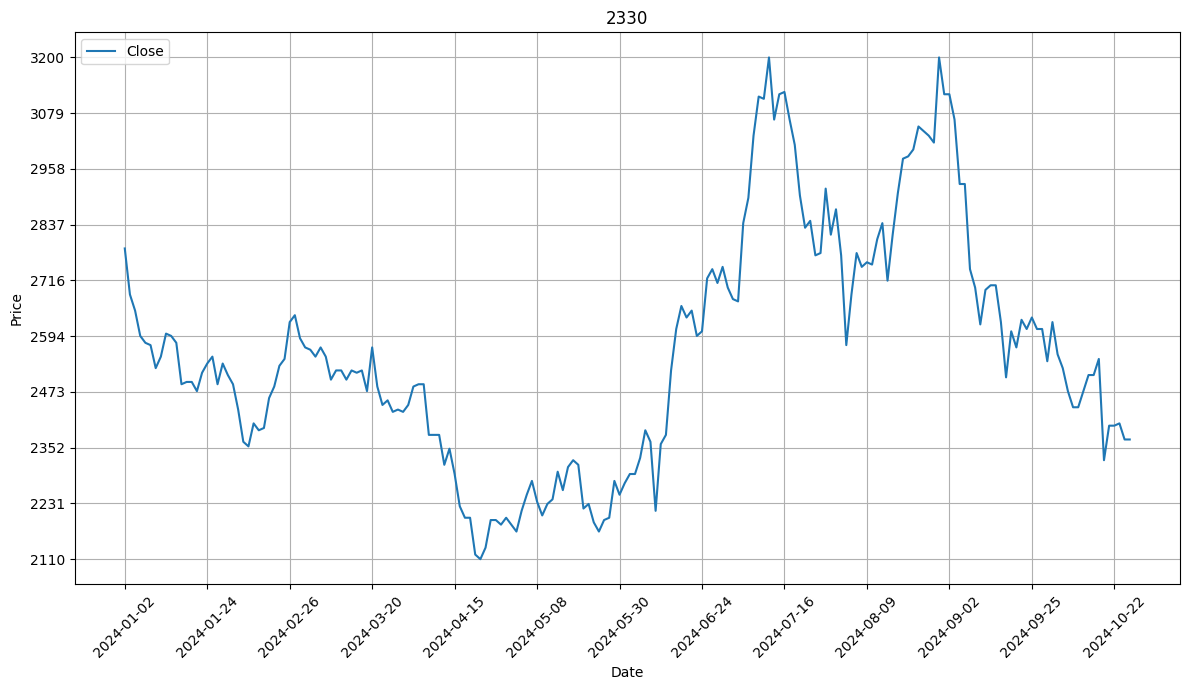

In [2]:
# 將收盤價可視化
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for linspace

# 畫布尺寸大小設定
plt.figure(figsize=(12, 7))

# 設定要繪製的資料欄位
plt.plot(df['收盤價'], label='Close')

# 設定 x 軸的時間
num = 12
date = df["日期"].dt.strftime('%Y-%m-%d')
plt.xticks(date[::len(date)//num].index,
           date[::len(date)//num],
           rotation=45)

# 設定圖表的標題，x 軸和 y 軸的標籤
plt.title('2330')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.grid(True)

# 設定 y 軸刻度，平均間隔顯示十個數字
# Get the minimum and maximum values of the '收盤價' column
ymin = df['收盤價'].min()
ymax = df['收盤價'].max()

# Generate 10 evenly spaced values between ymin and ymax
yticks = np.linspace(ymin, ymax, 10)
# Set the y-axis ticks to the generated values
plt.yticks(yticks)

plt.tight_layout()

# 顯示圖表
plt.show()

# 作業1：使用PyTorch實作類神經網路模型預測股票價格

In [3]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 假設 data 是一整年的收盤價數據
data = np.array(df['收盤價'])
scaler = MinMaxScaler(feature_range=(-1, 1))
data_normalized = scaler.fit_transform(data.reshape(-1, 1))

# 訓練集與測試集分割：最後 30 天為測試集
window_size = 30
test_size = 30
train_data = data_normalized[:-test_size]
test_data = data_normalized[-(test_size + window_size):]

# 創建訓練和測試序列
def create_sequences(data, window_size):
    sequences = []
    labels = []
    for i in range(len(data) - window_size):
        sequences.append(data[i:i+window_size])
        labels.append(data[i+window_size])
    return torch.FloatTensor(sequences), torch.FloatTensor(labels)

train_sequences, train_labels = create_sequences(train_data, window_size)
test_sequences, test_labels = create_sequences(test_data, window_size)

# 定義 LSTM 模型
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=50, output_size=1):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_layer_size)
        self.linear = nn.Linear(hidden_layer_size, output_size)
        self.hidden_cell = (torch.zeros(1, 1, hidden_layer_size),
                            torch.zeros(1, 1, hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq), 1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

model = LSTMModel()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 訓練模型
epochs = 100
for i in range(epochs):
    for seq, label in zip(train_sequences, train_labels):
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_cell[0].shape[2]),
                             torch.zeros(1, 1, model.hidden_cell[1].shape[2]))

        y_pred = model(seq)

        single_loss = loss_function(y_pred, label)
        single_loss.backward()
        optimizer.step()

    if i % 10 == 0:
        print(f'Epoch {i} Loss: {single_loss.item()}')

# 使用測試集進行最後30天預測
with torch.no_grad():
    model.eval()
    test_preds = []
    for seq in test_sequences:
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_cell[0].shape[2]),
                             torch.zeros(1, 1, model.hidden_cell[1].shape[2]))
        test_preds.append(model(seq).item())

# 還原預測結果到原始價格範圍
test_preds = scaler.inverse_transform(np.array(test_preds).reshape(-1, 1))
print(test_preds)

<ipython-input-3-ec4661f1321a>:25: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  return torch.FloatTensor(sequences), torch.FloatTensor(labels)


Epoch 0 Loss: 0.48607420921325684
Epoch 10 Loss: 0.023548370227217674
Epoch 20 Loss: 0.007932773791253567
Epoch 30 Loss: 0.010270643047988415
Epoch 40 Loss: 0.01542531419545412
Epoch 50 Loss: 0.010784285143017769
Epoch 60 Loss: 0.0017974328948184848
Epoch 70 Loss: 4.670935140893562e-06
Epoch 80 Loss: 0.00048615061677992344
Epoch 90 Loss: 9.554562711855397e-05
[[2771.74747303]
 [2751.40570819]
 [2750.43152958]
 [2740.88154837]
 [2747.91321501]
 [2733.54732081]
 [2683.52190178]
 [2730.90247899]
 [2699.56966635]
 [2742.21888781]
 [2719.03304134]
 [2737.9885897 ]
 [2709.33825221]
 [2699.51236364]
 [2624.66696378]
 [2680.72877619]
 [2607.87402436]
 [2565.42911842]
 [2489.15240139]
 [2432.37062618]
 [2414.10556495]
 [2437.52306268]
 [2465.6476827 ]
 [2460.67613631]
 [2484.97917861]
 [2288.7287873 ]
 [2342.37767309]
 [2353.56290936]
 [2367.61584759]
 [2331.60924584]]


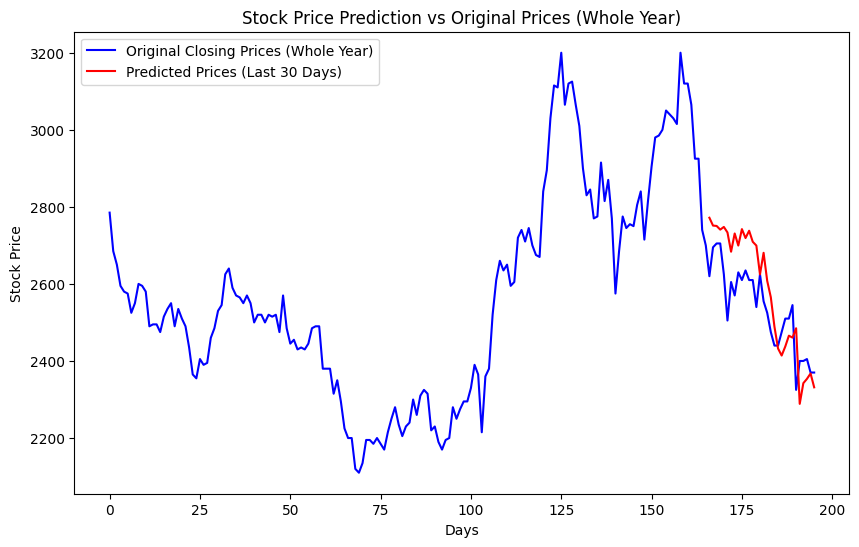

In [4]:
# 可視化原始整年收盤價與預測結果
plt.figure(figsize=(10,6))

# 畫出整年的原始收盤價
plt.plot(data, label='Original Closing Prices (Whole Year)', color='blue')

# 畫出預測的折線圖，並與原始數據對齊
plt.plot(range(len(data) - test_size, len(data)), test_preds, label='Predicted Prices (Last 30 Days)', color='red')

# 添加標籤和標題
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction vs Original Prices (Whole Year)')
plt.legend()

# 顯示圖表
plt.show()


# 作業2：使用PyTorch 實作 CNN 捕捉 K 線趨勢，並預測股價漲跌（分類任務）。

In [6]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 6.4 MB/s eta 0:00:00


In [16]:
# 先畫出K線圖, 以30天為周期
import mplfinance as mpf
import pandas as pd

df_ = df.copy()
df_ = df_.set_index('日期')
df_.index = pd.to_datetime(df_.index)

# 先提取OHLC數據
n = 30
kdf = pd.DataFrame(df_, columns=["開盤價", "最高價", "最低價", "收盤價"])
kdf = kdf.rename(columns={
    "開盤價": "Open",
    "最高價": "High",
    "最低價": "Low",
    "收盤價": "Close",
    "成交股數": "Volume"
})
for i in range(0, len(kdf) - n):  # n 為每張K線圖的天數
    data_slice = kdf.iloc[i:i + n]  # 分段取出資料
    mpf.plot(data_slice, type='candle', savefig=f'kline_{i}.png')


In [30]:
# 製作標籤
labels = []
for i in range(len(kdf) - n):
    if kdf['Close'].iloc[i + n] > kdf['Close'].iloc[i + n - 1]:
        labels.append(1)  # 上漲
    else:
        labels.append(0)  # 下跌

In [32]:
# 將圖片分類(漲或跌)
import os
import shutil

image_dir = "/content"  # K線圖所在的資料夾
train_dir = "train"

# 建立 0 和 1 的資料夾
os.makedirs(f"{train_dir}/0", exist_ok=True)
os.makedirs(f"{train_dir}/1", exist_ok=True)

# 將 K 線圖按照標籤分類存放
for i, label in enumerate(labels):
    src_image_path = os.path.join(image_dir, f"kline_{i}.png")
    dest_dir = os.path.join(train_dir, str(label))
    shutil.copy(src_image_path, dest_dir)


In [33]:
# 創建Dataloader
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

# 定義圖片轉換
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # 調整圖片大小為224x224
    transforms.ToTensor()
])

# 使用ImageFolder加載資料集
dataset = ImageFolder(root=train_dir, transform=transform)

# 建立 DataLoader
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)


In [34]:
# 看一下是否有正確載入
for images, labels in train_loader:
    print("Batch of images shape:", images.shape)  # 應為 [batch_size, 3, 224, 224]
    print("Batch of labels:", labels)
    break


Batch of images shape: torch.Size([32, 3, 224, 224])
Batch of labels: tensor([1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
        1, 1, 0, 0, 0, 1, 0, 0])


In [37]:
# 建構CNN模型
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 56 * 56, 128)
        self.fc2 = nn.Linear(128, 2)  # 輸出為二分類

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 56 * 56)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = CNNModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [38]:
# 開始訓練
epochs = 10
for epoch in range(epochs):
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()


Image Index: 72 - True Label: 0 - Predicted Label: 0


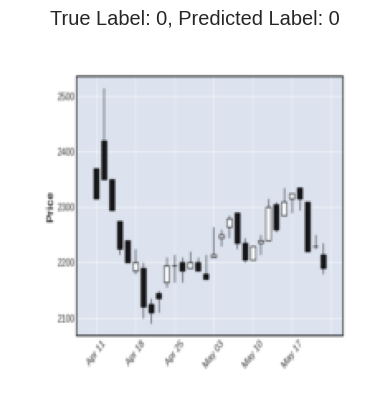

Image Index: 113 - True Label: 1 - Predicted Label: 1


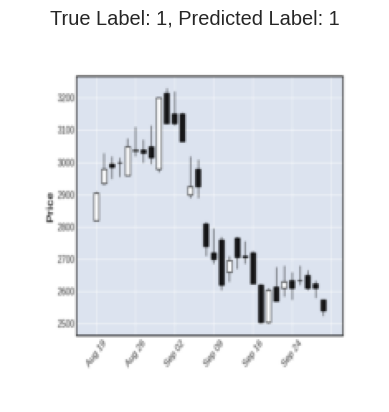

Image Index: 14 - True Label: 0 - Predicted Label: 0


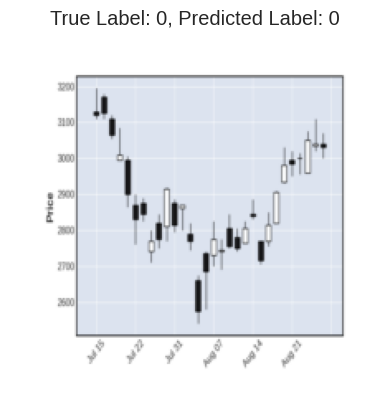

Image Index: 149 - True Label: 1 - Predicted Label: 1


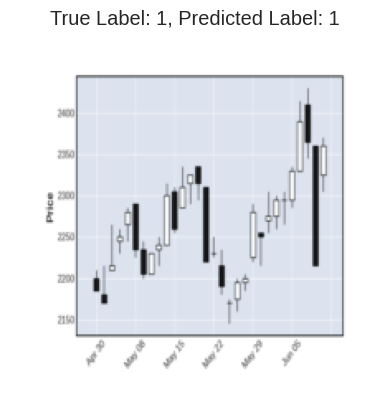

Image Index: 121 - True Label: 1 - Predicted Label: 1


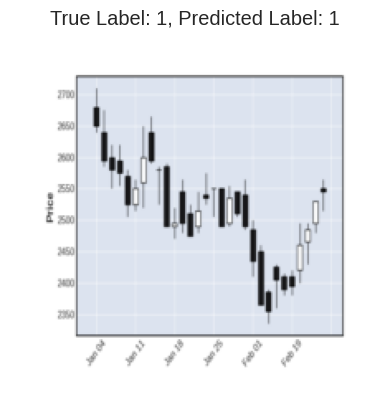

Image Index: 118 - True Label: 1 - Predicted Label: 1


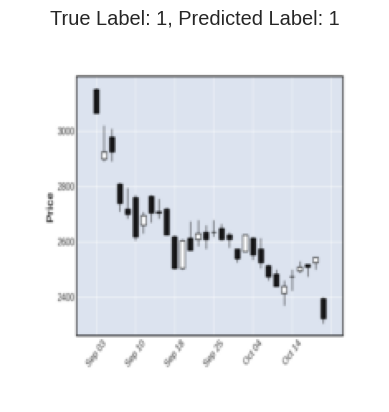

Image Index: 153 - True Label: 1 - Predicted Label: 1


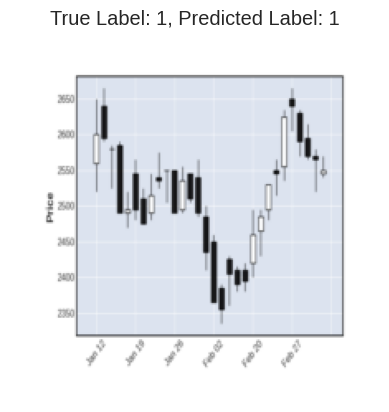

Image Index: 50 - True Label: 0 - Predicted Label: 0


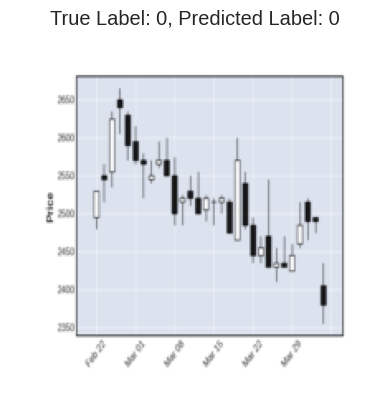

Image Index: 102 - True Label: 1 - Predicted Label: 1


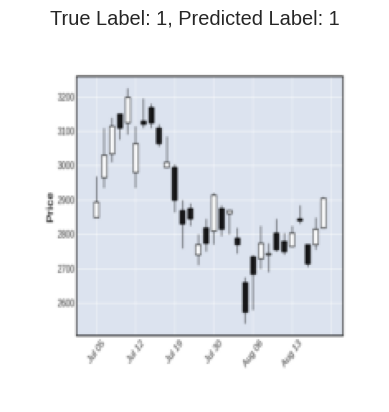

Image Index: 25 - True Label: 0 - Predicted Label: 0


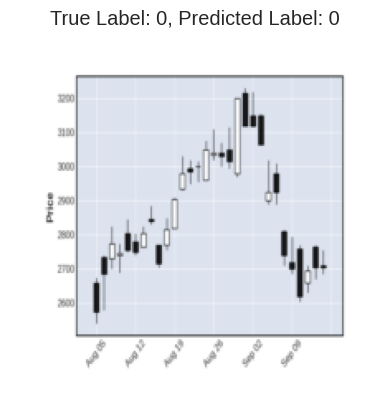

In [40]:
# 隨便拿十張圖片測試看看
from torchvision.datasets import ImageFolder
from torchvision import transforms
from PIL import Image
import random

# 定義圖片轉換
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # 調整圖片大小為224x224
    transforms.ToTensor()
])

# 使用 ImageFolder 加載資料
dataset = ImageFolder(root="train", transform=transform)

# 隨機挑選10張圖片的索引
random_indices = random.sample(range(len(dataset)), 10)

# 遍歷隨機挑選的圖片並預測
with torch.no_grad():  # 禁用梯度計算
    for i in random_indices:
        image, true_label = dataset[i]  # 取得圖片和真實標籤
        image = image.unsqueeze(0)  # 增加 batch dimension

        # 預測圖片標籤
        output = model(image)
        _, predicted_label = torch.max(output, 1)

        # 輸出結果
        print(f"Image Index: {i} - True Label: {true_label} - Predicted Label: {predicted_label.item()}")

        # 顯示圖片（選擇性）
        image_pil = transforms.ToPILImage()(image.squeeze(0))
        plt.imshow(image_pil)
        plt.title(f"True Label: {true_label}, Predicted Label: {predicted_label.item()}")
        plt.axis('off')
        plt.show()


